In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [8]:
# Loading data
df = pd.read_csv('/content/spotify.csv')
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [9]:
df.tail()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.333,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.131,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


In [10]:

##Data Cleaning Start


In [11]:
# Dropping irrelevant columns
df.drop(columns=['Unnamed: 0', 'song_title', 'artist'], inplace=True)

In [12]:
# View basic structure
print(df.info())
print(df.isnull().sum())  # Check for nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 220.7 KB
None
acousticness        0
danceability        0
duration_ms         0
energy           

In [13]:
df.duplicated().value_counts()

,count
False,2011
True,6


In [14]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)

In [15]:
# Map categorical variables
df['key'] = df['key'].map({
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F',
    6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'
    })

In [16]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,D,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,C#,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,D,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,F,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,F,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2011 non-null   float64
 1   danceability      2011 non-null   float64
 2   duration_ms       2011 non-null   int64  
 3   energy            2011 non-null   float64
 4   instrumentalness  2011 non-null   float64
 5   key               2011 non-null   object 
 6   liveness          2011 non-null   float64
 7   loudness          2011 non-null   float64
 8   mode              2011 non-null   int64  
 9   speechiness       2011 non-null   float64
 10  tempo             2011 non-null   float64
 11  time_signature    2011 non-null   float64
 12  valence           2011 non-null   float64
 13  target            2011 non-null   int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 235.7+ KB


In [18]:
summary_df = pd.DataFrame({
    'Feature': ['tempo', 'loudness', 'valence', 'duration_ms', 'energy', 'speechiness'],
    'Min': [df['tempo'].min(), df['loudness'].min(), df['valence'].min(),
            df['duration_ms'].min(), df['energy'].min(), df['speechiness'].min()],
    'Max': [df['tempo'].max(), df['loudness'].max(), df['valence'].max(),
            df['duration_ms'].max(), df['energy'].max(), df['speechiness'].max()],
    'Mean': [df['tempo'].mean(), df['loudness'].mean(), df['valence'].mean(),
             df['duration_ms'].mean(), df['energy'].mean(), df['speechiness'].mean()]
})

summary_df

,Feature,Min,Max,Mean
0,tempo,47.8590,219.331,121.612922
1,loudness,-33.0970,-0.307,-7.076632
2,valence,0.0348,0.992,0.497507
3,duration_ms,16042.0000,1004627.000,246275.509697
4,energy,0.0148,0.998,0.681923
5,speechiness,0.0231,0.816,0.092449


In [6]:
### EDA Start

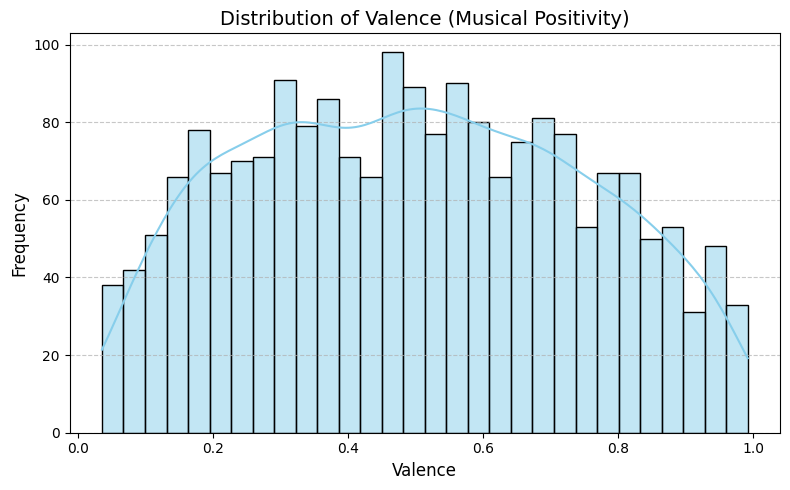

In [19]:
# Plotting the distribution of Valence
plt.figure(figsize=(8, 5))
sns.histplot(df['valence'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Valence (Musical Positivity)', fontsize=14)
plt.xlabel('Valence', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

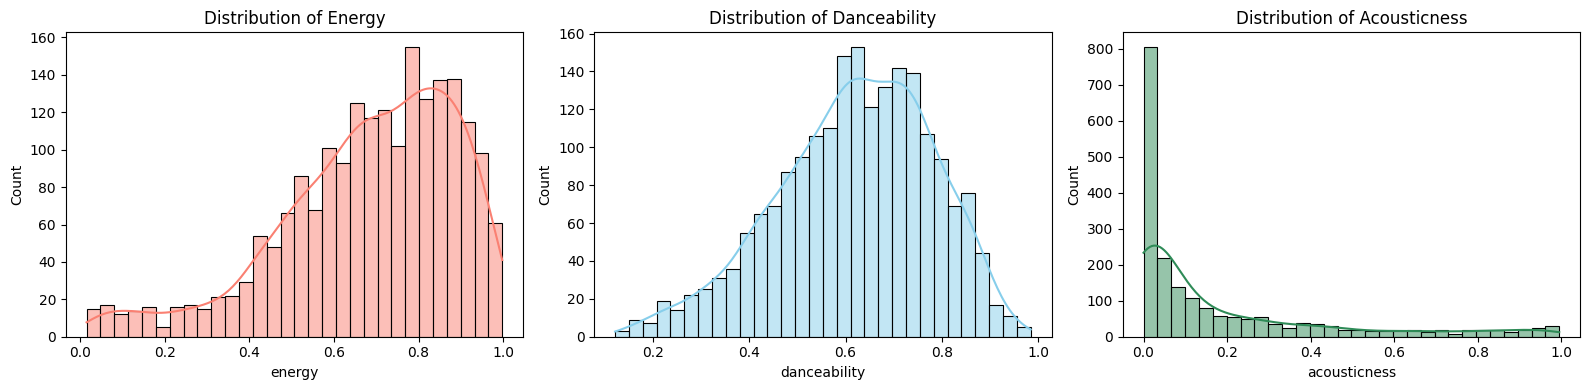

In [22]:
# Plotting the distributions of top predictors
plt.figure(figsize=(16, 4))

#Energy plot
plt.subplot(1, 3, 1)
sns.histplot(df['energy'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Energy')

#Danceability plot
plt.subplot(1, 3, 2)
sns.histplot(df['danceability'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Danceability')

#acousticness plot
plt.subplot(1, 3, 3)
sns.histplot(df['acousticness'], kde=True, bins=30, color='seagreen')
plt.title('Distribution of Acousticness')

plt.tight_layout()
plt.show()


<ipython-input-23-6091c7cb7313>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='key', y='loudness', palette='Spectral')


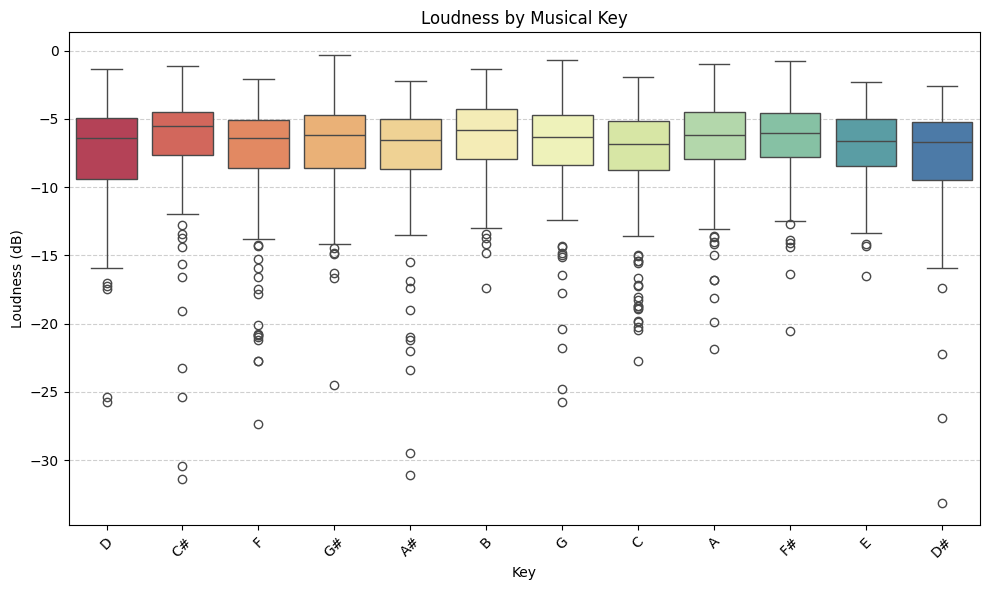

In [23]:
#Plotting a boxplot of Loudness by musicl key
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='key', y='loudness', palette='Spectral')
plt.title('Loudness by Musical Key')
plt.xlabel('Key')
plt.ylabel('Loudness (dB)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-24-f9a6a375fe2c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='key', y='energy', palette='coolwarm')


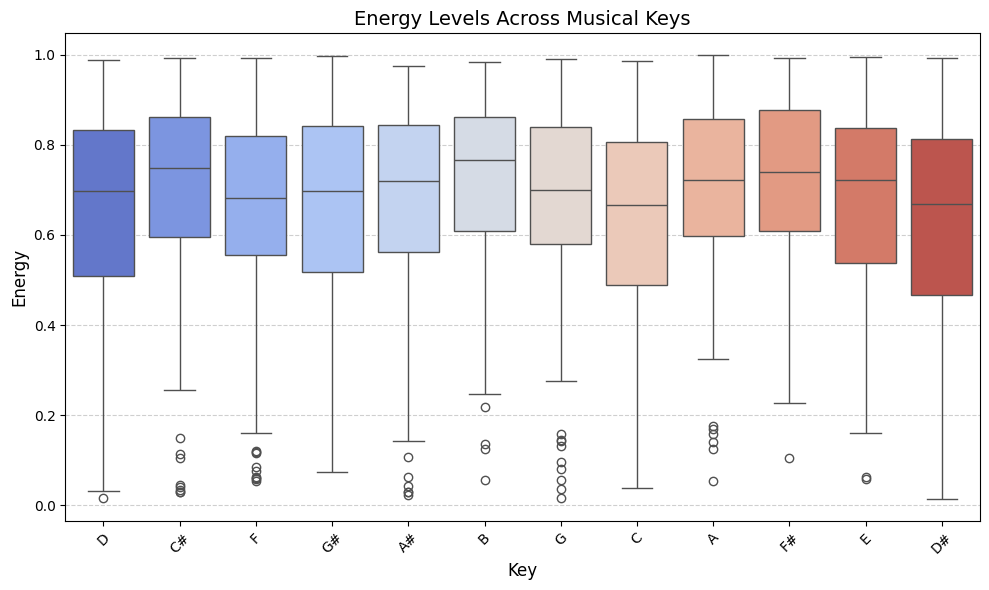

In [24]:
# Plotting the Energy by Musical Key
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='key', y='energy', palette='coolwarm')
plt.title('Energy Levels Across Musical Keys', fontsize=14)
plt.xlabel('Key', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-27-955db2bb622d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='mode', y='valence', palette='Set2')


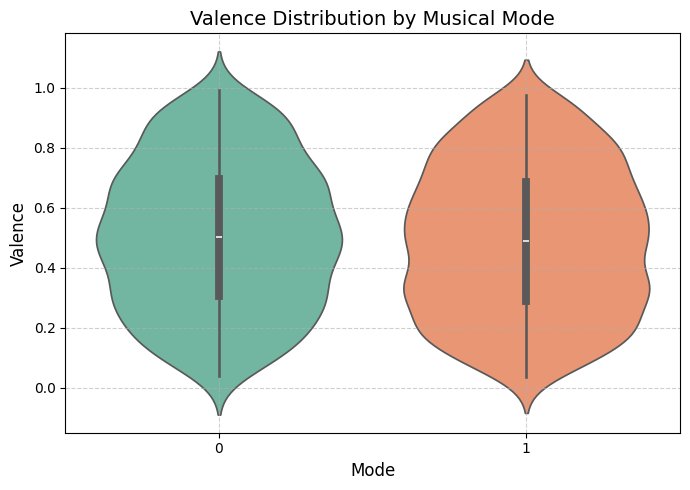

In [27]:
# Plotting a Violin plot of Valence by Mode (Major vs Minor)
plt.figure(figsize=(7, 5))
sns.violinplot(data=df, x='mode', y='valence', palette='Set2')
plt.title('Valence Distribution by Musical Mode', fontsize=14)
plt.xlabel('Mode', fontsize=12)
plt.ylabel('Valence', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<Axes: xlabel='energy_x_danceability', ylabel='valence'>

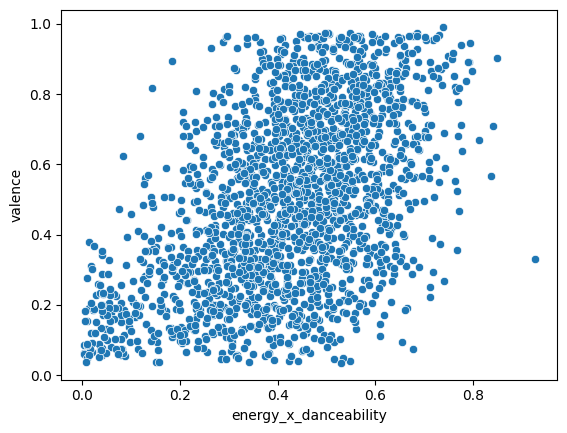

In [37]:
#Use of an engineered feature
df['energy_x_danceability'] = df['energy'] * df['danceability']
sns.scatterplot(data=df, x='energy_x_danceability', y='valence')

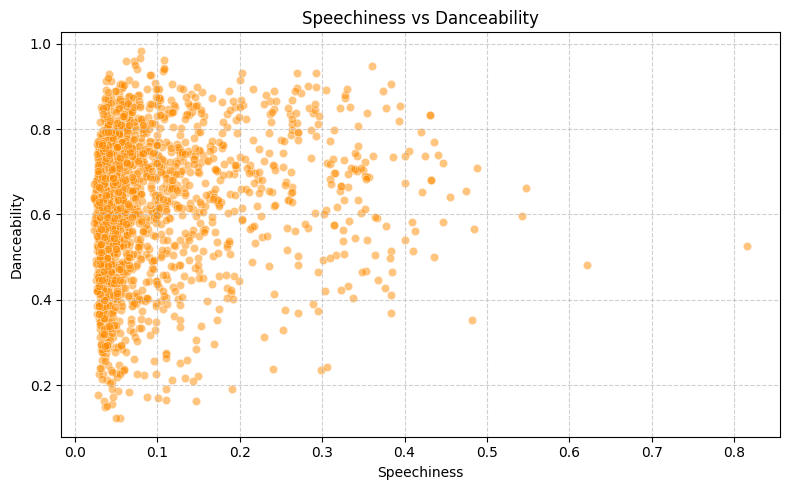

In [28]:
# Making A Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='speechiness', y='danceability', alpha=0.5, edgecolor='w', color='darkorange')
plt.title('Speechiness vs Danceability')
plt.xlabel('Speechiness')
plt.ylabel('Danceability')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


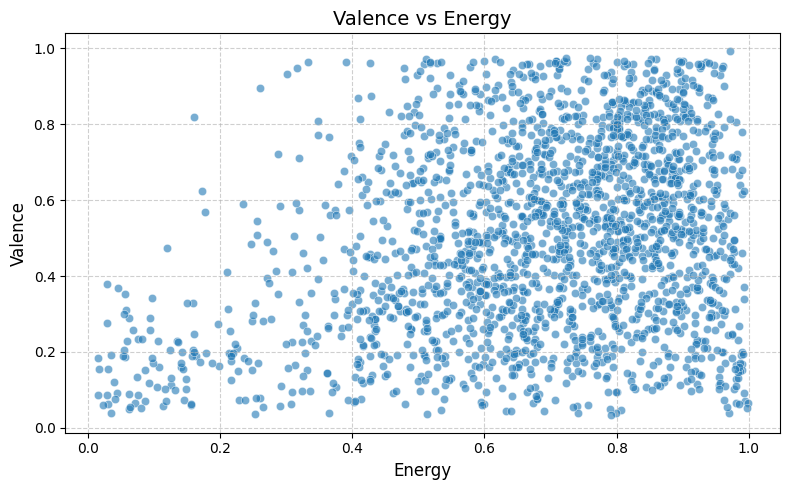

In [29]:
# # Making A Scatterplot of Valence vs Energy
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='energy', y='valence', alpha=0.6, edgecolor='w')
plt.title('Valence vs Energy', fontsize=14)
plt.xlabel('Energy', fontsize=12)
plt.ylabel('Valence', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

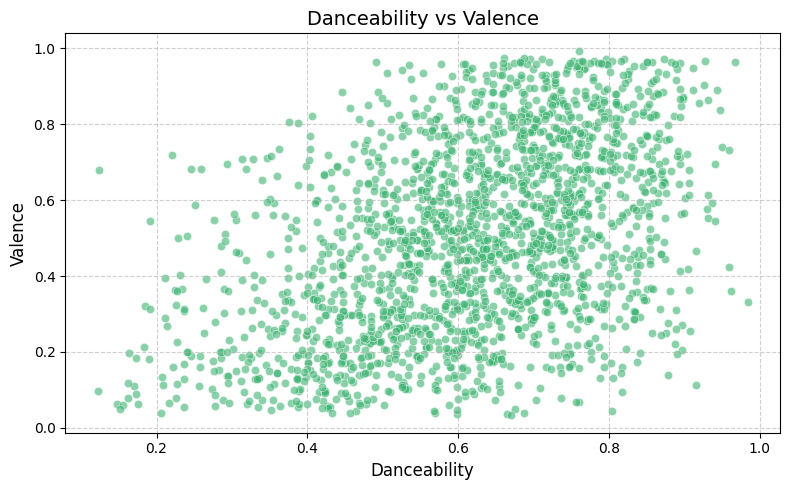

In [30]:
# # Making A Scatterplot of Danceability vs Valence
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='danceability', y='valence', alpha=0.6, edgecolor='w', color='mediumseagreen')
plt.title('Danceability vs Valence', fontsize=14)
plt.xlabel('Danceability', fontsize=12)
plt.ylabel('Valence', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


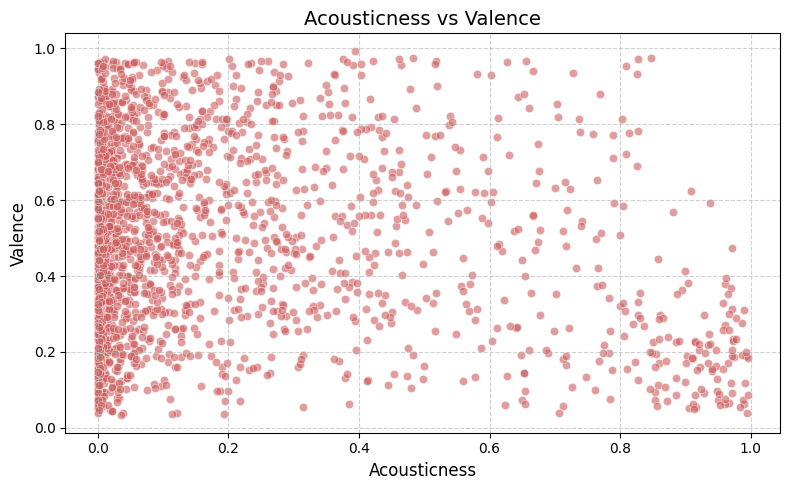

In [31]:
# # Making A Scatterplot of Acousticness vs Valence
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='acousticness', y='valence', alpha=0.6, edgecolor='w', color='indianred')
plt.title('Acousticness vs Valence', fontsize=14)
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Valence', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


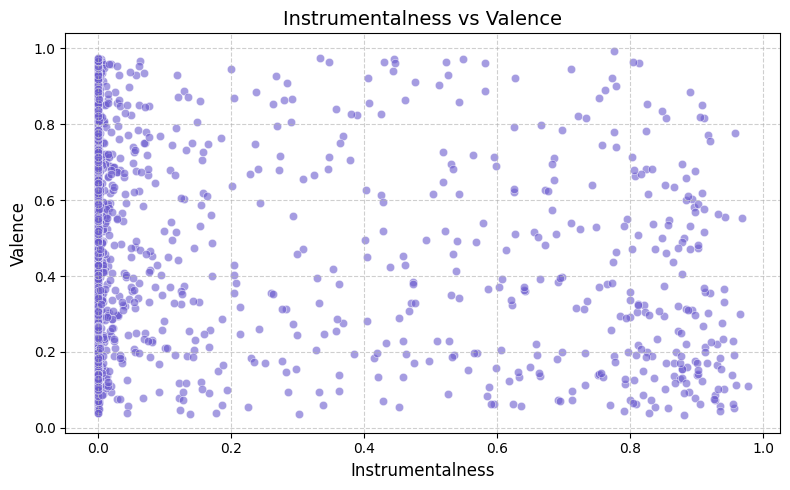

In [32]:
# # Making A Scatterplot of Instrumentalness vs Valence
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='instrumentalness', y='valence', alpha=0.6, edgecolor='w', color='slateblue')
plt.title('Instrumentalness vs Valence', fontsize=14)
plt.xlabel('Instrumentalness', fontsize=12)
plt.ylabel('Valence', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


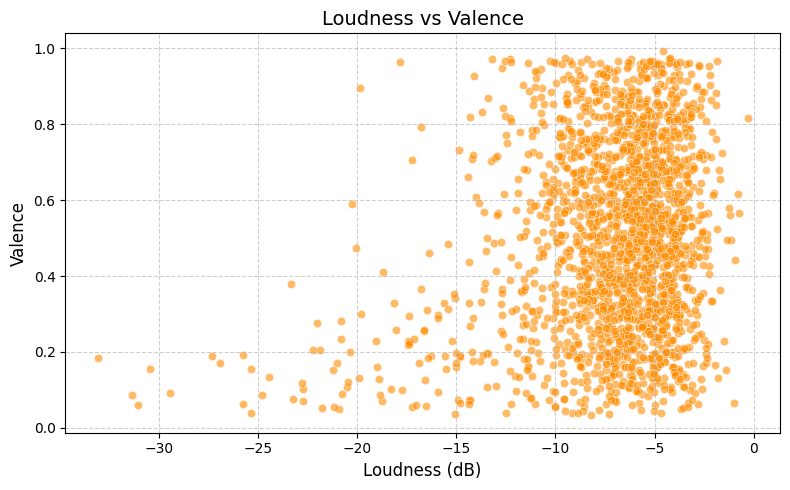

In [33]:
# # Making A Scatterplot of Loudness vs Valence
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='loudness', y='valence', alpha=0.6, edgecolor='w', color='darkorange')
plt.title('Loudness vs Valence', fontsize=14)
plt.xlabel('Loudness (dB)', fontsize=12)
plt.ylabel('Valence', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


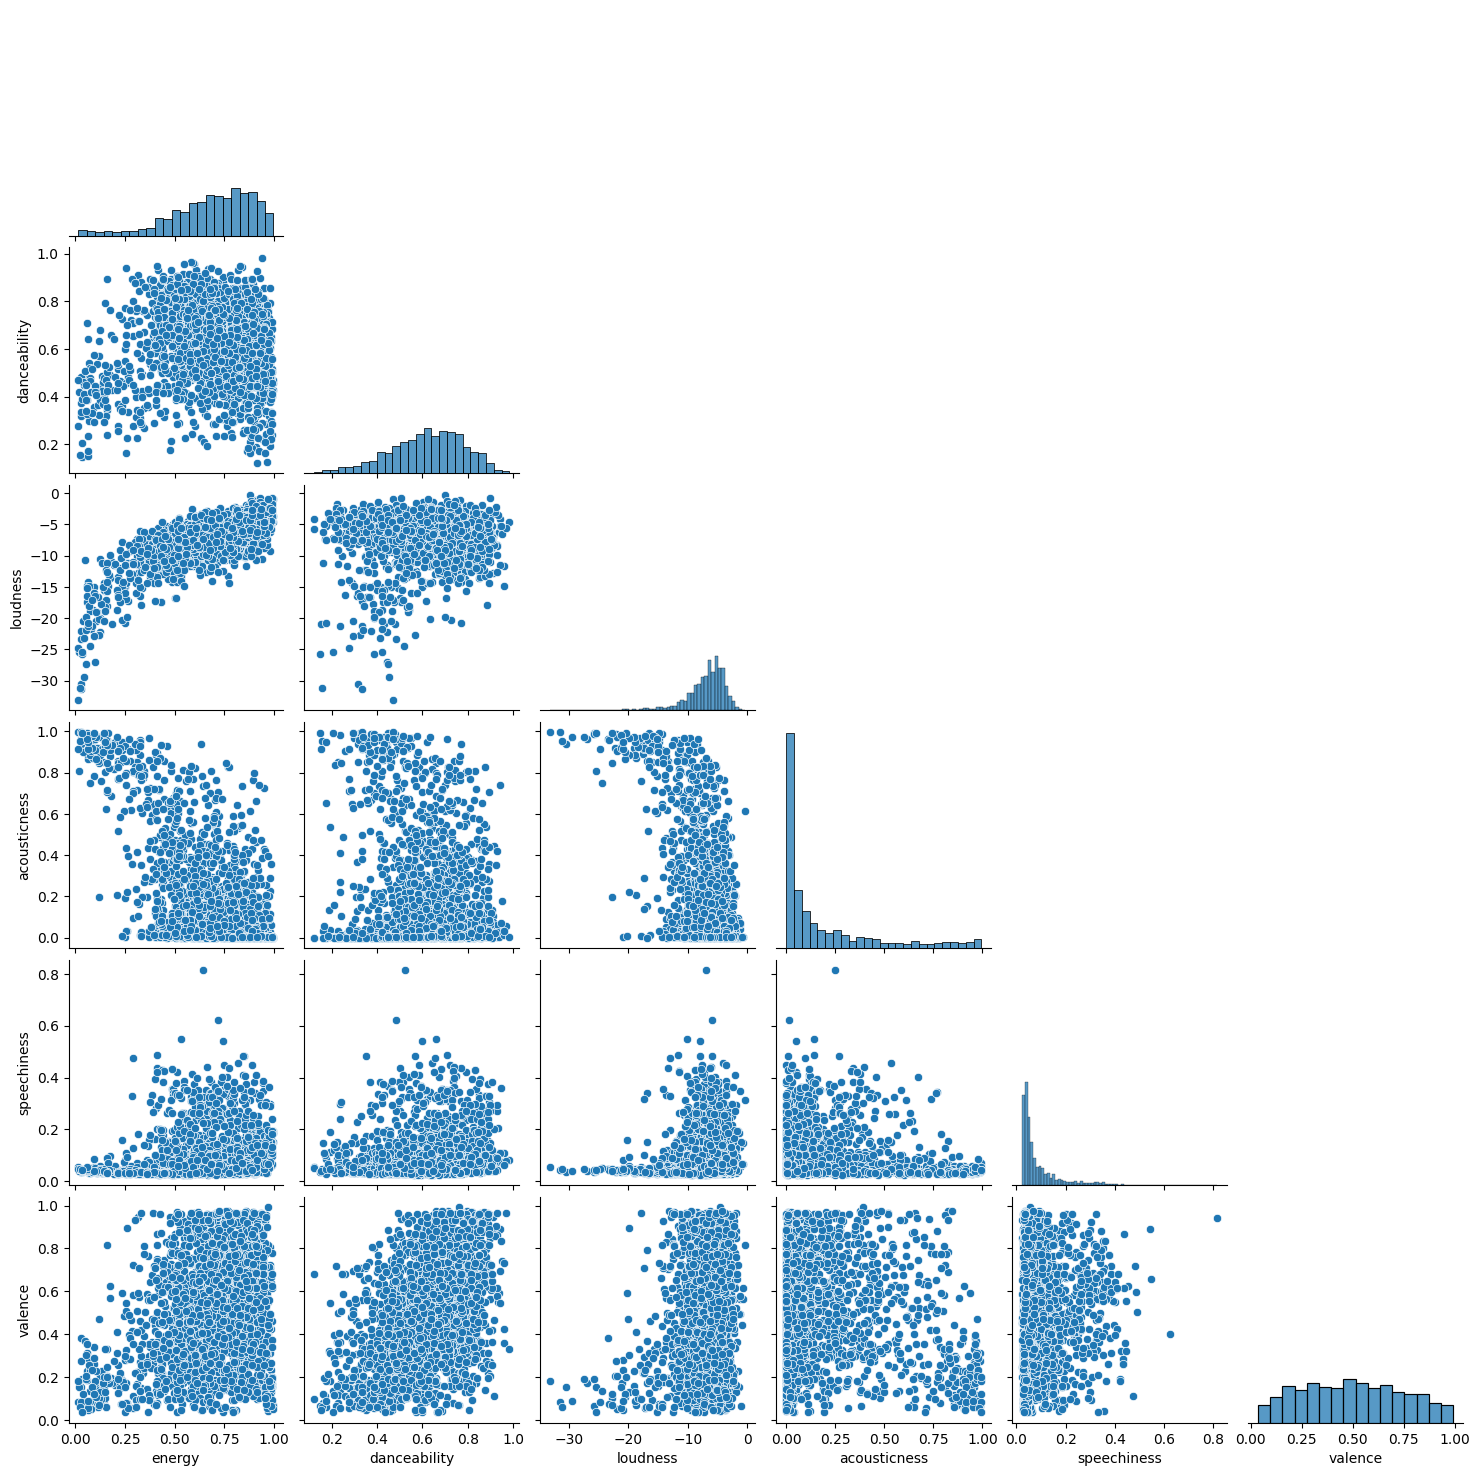

In [35]:
#Using seaborn as a summary of scatterplot methods. This shows all the scatterplots we have derived above, and between all key variables
features = ['energy', 'danceability', 'loudness', 'acousticness', 'speechiness']
sns.pairplot(df[features + ['valence']], corner=True)


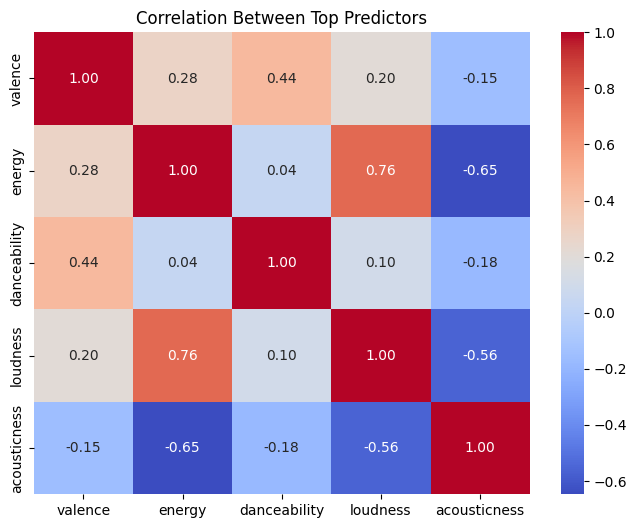

In [26]:
# Focused correlation matrix on top features
top_features = ['valence', 'energy', 'danceability', 'loudness', 'acousticness']
plt.figure(figsize=(8, 6))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Top Predictors')
plt.show()
